In [13]:
import pandas as pd
import numpy as np

Xmatch = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/data/BZCAT_Xmatch_ACC_csv.csv') # # = 37671
VLASS = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/data/VLASS_csv.csv')  # # = 8499

def ClearData():
    data = {'Name': [],
    'RA': [],
    'DEC': [],
    'z': [], 
    'Rmag': [],
    'class': [],
    'flux_ratio': [],
    'flux_143': [], 
    'flux_xray': [],
    'flux_gamma': [],
    'Spec_index': [], 
    'flux_ALMA': [], 
    'errflux': [], 
    'band': [],
    'freq': [],
    'date': [],
    'Ftot': [],
    'eFtot': [],
    'Fpeak': [], 
    'eFpeak': [] ,
    'Ft_Fp_ratio': [] }
    return data

In [ ]:
for i, Dataname in enumerate(set(Xmatch.name[0:len(Xmatch.RA_hh)-1])): # enumerate(set(Xmatch.name[0:len(Xmatch.RA_hh)-1]))
#for i in range(422, 423): 
    # set: find every name
    # enumerate: add index and list out the name
    
    #Dataname = str('J0413-5332')
    print('i = ',i, ' ,source name: ', Dataname)    
    df = ClearData()
    
    RAX_hh = Xmatch['RA_hh'][Xmatch['name'] == Dataname].values[0] # RA_hh which name is consist with "Dataname", than extract it value (.values[0])
    RAX_mm = Xmatch['RA_mm'][Xmatch['name'] == Dataname].values[0]
    RAX_ss = Xmatch['RA_ss'][Xmatch['name'] == Dataname].values[0]
    DECX_dd = Xmatch['DEC_dd'][Xmatch['name'] == Dataname].values[0]
    DECX_mm = Xmatch['DEC_mm'][Xmatch['name'] == Dataname].values[0]
    DECX_ss = Xmatch['DEC_ss'][Xmatch['name'] == Dataname].values[0]
    
    # combine Xmatch coordinates into a string array
    RA_X  = f'{RAX_hh} {RAX_mm} {RAX_ss}' # sort RA in to a string array (f'')
    DEC_X = f'{DECX_dd} {DECX_mm} {DECX_ss}' # sort RA in to a string array
    
    writeXmatch = True
    for j in range(2, len(VLASS.RA_hh)-1): #range(2, 8): # range(2, len(VLASS.RA_hh)-1): *** MUST start from 2***
        
        RA_V  = f'{VLASS.RA_hh[j]} {VLASS.RA_mm[j]} {float(VLASS.RA_ss[j])}'
        DEC_V = f'{VLASS.DEC_dd[j]} {VLASS.DEC_mm[j]} {float(VLASS.DEC_ss[j])}'

        if (RA_X == RA_V):
            
            if writeXmatch: # if true
                
                ### in order to find the index of the same name
                Index = Xmatch[Xmatch['name'] == Dataname].index.tolist() # convert the index into a list 

                for x in Index: 
                    
                    df['Name'].append(Xmatch.name[x])
                    df['RA'].append(Xmatch.RA[x])
                    df['DEC'].append(Xmatch.DEC[x])
                    df['z'].append(Xmatch.z[x])
                    df['Rmag'].append(Xmatch.Rmag[x])
                    df['class'].append(Xmatch.Class[x])
                    df['band'].append(Xmatch.band[x])
                    df['freq'].append(Xmatch.freq[x])
                    df['date'].append(Xmatch.date[x])
                    df['flux_ratio'].append(Xmatch.flux_ratio[x])
                    df['flux_143'].append(Xmatch.flux_143[x])
                    df['flux_xray'].append(Xmatch.flux_xray[x])
                    df['flux_gamma'].append(Xmatch.flux_gamma[x])
                    df['Spec_index'].append(Xmatch.Spec_index[x]) 
                    df['flux_ALMA'].append(Xmatch.flux_ALMA[x])
                    df['errflux'].append(Xmatch.errflux[x])   
                    
                writeXmatch = False
                
            if not np.isnan(float(VLASS.Ftot[j])): # if Ftot is not NaN
               
                #print('have VLASS data')
                df['Ftot'].append(float(VLASS.Ftot[j]))
                df['eFtot'].append(float(VLASS.e_Ftot[j]))
                df['Fpeak'].append(float(VLASS.Fpeak[j]))
                df['eFpeak'].append(float(VLASS.e_Fpeak[j]))
                
                if (float(VLASS.Ftot[j]) != 0.0 and float(VLASS.Fpeak[j]) != 0.0):
                    
                    df['Ft_Fp_ratio'].append( float(VLASS.Ftot[j])/float(VLASS.Fpeak[j]) )
                    
                else:
                
                    df['Ft_Fp_ratio'].append( np.nan )
                                    
        else:
                
            if writeXmatch: # if true
                
                ### in order to find the index of the same name
                Index = Xmatch[Xmatch['name'] == Dataname].index.tolist() # convert the index into a list 

                for x in Index: 
                    
                    df['Name'].append(Xmatch.name[x])
                    df['RA'].append(Xmatch.RA[x])
                    df['DEC'].append(Xmatch.DEC[x])
                    df['z'].append(Xmatch.z[x])
                    df['Rmag'].append(Xmatch.Rmag[x])
                    df['class'].append(Xmatch.Class[x])
                    df['band'].append(Xmatch.band[x])
                    df['freq'].append(Xmatch.freq[x])
                    df['date'].append(Xmatch.date[x])
                    df['flux_ratio'].append(Xmatch.flux_ratio[x])
                    df['flux_143'].append(Xmatch.flux_143[x])
                    df['flux_xray'].append(Xmatch.flux_xray[x])
                    df['flux_gamma'].append(Xmatch.flux_gamma[x])
                    df['Spec_index'].append(Xmatch.Spec_index[x]) 
                    df['flux_ALMA'].append(Xmatch.flux_ALMA[x])
                    df['errflux'].append(Xmatch.errflux[x])   

                writeXmatch = False

                
    len_Xmatch = len(df['Name'])
    len_VLASS  = len(df['Ftot'])
    
    print('len_Xmatch = ', len_Xmatch, ' len_VLASS = ', len_VLASS)
    
    # Xmatch data number > VLASS data number
    if len_Xmatch > len_VLASS:
        
        difflen = len_Xmatch - len_VLASS 
        
        for ii in range(difflen):
            
            df['Ftot'].append(np.nan)
            df['eFtot'].append(np.nan)
            df['Fpeak'].append(np.nan)
            df['eFpeak'].append(np.nan)
            df['Ft_Fp_ratio'].append(np.nan)
            
    # VLASS data number > Xmatch data number
    elif len_Xmatch < len_VLASS:
        
        difflen = abs(len_Xmatch - len_VLASS)
        #difflen = len_VLASS - len_Xmatch
        
        for ii in range(difflen):
            
            df['Name'].append(np.nan)
            df['RA'].append(np.nan)
            df['DEC'].append(np.nan)
            df['z'].append(np.nan)
            df['Rmag'].append(np.nan)
            df['class'].append(np.nan)
            df['band'].append(np.nan)
            df['freq'].append(np.nan)
            df['date'].append(np.nan)
            df['flux_ratio'].append(np.nan)
            df['flux_143'].append(np.nan)
            df['flux_xray'].append(np.nan)
            df['flux_gamma'].append(np.nan)
            df['Spec_index'].append(np.nan)
            df['flux_ALMA'].append(np.nan)
            df['errflux'].append(np.nan)
            
    #print(pd.DataFrame(df))
    
    SAVEpath = '/Users/87steven/Documents/ASIAA/Blazar SED code and data/VLASS match'   
    
    CSVfile = f'{SAVEpath}/{Dataname}.csv'    
    dff = pd.DataFrame(df)      
    dff.to_csv(CSVfile, index = False)
    
    print('================================================EOF================================================')

In [23]:
RA_X 

'4 13 13.48'

In [24]:
RA_V

'nan nan nan'

In [ ]:
## find sources which Have VLASS data

aa = []

SAVEpath = 'D:\許\ASIAA\SED progress'


for j in range(2, len(VLASS.RA_hh)-1): 
    
    print('j = ', j)

    RA_V  = f'{VLASS.RA_hh[j]} {VLASS.RA_mm[j]} {float(VLASS.RA_ss[j])}'
    DEC_V = f'{VLASS.DEC_dd[j]} {VLASS.DEC_mm[j]} {float(VLASS.DEC_ss[j])}'

    check = True
    if check:
        for i, Dataname in enumerate(set(Xmatch.name[0:len(Xmatch.RA_hh)-1])): # enumerate(set(Xmatch.name[0:len(Xmatch.RA_hh)-1]))
    
        #print('i = ', i, ' ,source name =', Dataname)    
            df = ClearData()
    
            RAX_hh = Xmatch['RA_hh'][Xmatch['name'] == Dataname].values[0] # RA_hh which name is consist with "Dataname", than extract it value (.values[0])
            RAX_mm = Xmatch['RA_mm'][Xmatch['name'] == Dataname].values[0]
            RAX_ss = Xmatch['RA_ss'][Xmatch['name'] == Dataname].values[0]
            DECX_dd = Xmatch['DEC_dd'][Xmatch['name'] == Dataname].values[0]
            DECX_mm = Xmatch['DEC_mm'][Xmatch['name'] == Dataname].values[0]
            DECX_ss = Xmatch['DEC_ss'][Xmatch['name'] == Dataname].values[0]
    
            RA_X  = f'{RAX_hh} {RAX_mm} {RAX_ss}' 
            DEC_X = f'{DECX_dd} {DECX_mm} {DECX_ss}' 

            if str(RA_V == RA_X) == 'True':

                print('j = ', j, ' ,Have VLASS data')
                
                aa.append(Dataname)
            
                check = False
                
    print('================================================END=============================================')

                

filename = 'HAVE VLASS data'
CSVfile = f'{SAVEpath}/{filename}.csv'    
dff = pd.DataFrame(aa)      
dff.to_csv(CSVfile, index = False)


In [ ]:
## find sources with z = 0

aa = []

SAVEpath = 'D:\許\ASIAA\SED progress'

for i, Dataname in enumerate(set(Xmatch.name[0:len(Xmatch.name)-1])):
    
    #print('i = ', i, ' Dataname = ', Dataname)
    z = Xmatch['z'][Xmatch['name'] == Dataname].values[0]

    
    if str(z == 0.000) == 'True':
    
        #print('source name = ', Dataname, ' z = ', Xmatch.z[i])
    
        aa.append(Dataname)
        
        #print('z = ', z, ' Dataname = ', Dataname)

filename = 'no redshift'
CSVfile = f'{SAVEpath}/{filename}.csv'    
dff = pd.DataFrame(aa)      
dff.to_csv(CSVfile, index = False)

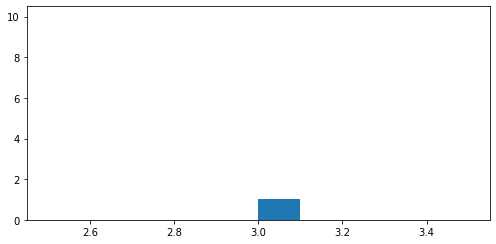

In [49]:
import matplotlib.pyplot as plt

k=(3,3,3,3)
x, bins, p = plt.hist(k, density=True)  # used to be normed=True in older versions

for item in p:
    item.set_height(item.get_height()/sum(x))
    
plt.show()  
